In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.stats import ttest_ind

In [2]:
float_types = ['ser', 'his', 'val', 'thr', 'pro', 'leu', 'ile', 'arg', 'glu']
short_names = float_types
long_names = ['Serine', 'Histidine', 'Valine', 'Threonine', 'Proline', 'Leucine', 'Isoleucine', 'Arginine', 'Glutamate']
dtypes = dict((aa, pd.np.float64) for aa in float_types)
fname = 'data/fig4/191118_run_f13C_extracted_transpose.csv'

# Data is the fraction of C atoms that are 13C
frac13c_df = pd.read_csv(fname, index_col=0, na_values='NAN', dtype=dtypes)

In [3]:
# calculate the implied 13C fraction from the difference between glu and arg
frac13_glu_implied = ((frac13c_df.arg*6) - (frac13c_df.glu*5))

# calculate the implied 13C fraction from the difference between pro and arg
frac13_pro_implied = ((frac13c_df.arg*6) - (frac13c_df.pro*5))

# mean of the two is an estimate of the intracellular DIC labeling fraction
mean_frac13c = ((frac13_pro_implied + frac13_glu_implied)/2).round(2)

# Calculate the fraction 12C in DIC in vivo. 
# Note that this calculation gives fractions > 1% for high CO2 CCMB1 probably of rubisco fixation.
mean_frac13c[mean_frac13c < 0] = 0
mean_frac12c = 1.0-mean_frac13c

# Convert to frac 12C as opposed to fraction 13C
frac12c_df = frac13c_df.copy()
frac12c_df[float_types] = 1.0 - frac12c_df[float_types]

In [4]:
# Correct the underlying data by the estimate of the DIC 13C labeling fraction 
means12c_frac = frac12c_df.groupby('sample_name').mean()
means12c_frac.loc['CCMB1_10pct'] / means12c_frac.loc['CAfree_10pct']
means12c_frac.loc['CCMB1_amb'] / means12c_frac.loc['CAfree_amb']

ser    2.314234
his    1.201421
val    1.665723
thr    1.483180
pro    0.976082
leu    0.922773
ile    1.195878
arg    1.221083
glu    0.987804
dtype: float64

In [5]:
pairs = [('CCMB1_10pct', 'CAfree_10pct'), ('CCMB1_amb', 'CAfree_amb')]
pvals = []
for p1, p2 in pairs:
    m1 = frac12c_df.sample_name == p1
    m2 = frac12c_df.sample_name == p2
    tt = ttest_ind(frac12c_df[m1].ser, frac12c_df[m2].ser)
    pvals.append(tt.pvalue)

In [6]:
# Nice plotting order
xorder = ['CAfree_10pct',
          'CCMB1_10pct',
          'CAfree_amb',
          'CCMB1_amb',]
xticks = ['Ctrl.', '+CCM'] * 2
greys = sns.color_palette('Greys', n_colors=8)

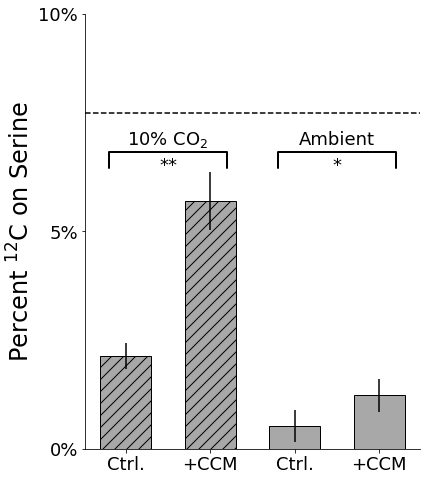

In [16]:
plt.figure(figsize=(6,8))
gly_coupling_slope = 2.156
theoretical_max_ser = 1/(2*3*gly_coupling_slope)

mean12c_atom_frac = frac12c_df.groupby('sample_name').mean()
std12c_atom_frac = frac12c_df.groupby('sample_name').std()
bar_vals = mean12c_atom_frac.loc[xorder].ser.values
err_vals = std12c_atom_frac.loc[xorder].ser.values

xs = np.arange(len(xorder)) + 0.5
bars = plt.bar(xs, bar_vals, width=0.6, color=greys[3], edgecolor='k')
plt.errorbar(xs, bar_vals, yerr=err_vals, ls='None', ecolor='k')
plt.axhline(theoretical_max_ser, ls='--', c='k')

for b in bars[:-2]:
    b.set_hatch('//')

props = {'connectionstyle':'bar','arrowstyle':'-',\
         'shrinkA':20,'shrinkB':20,'linewidth':2}
annots = ['10% CO$_2$', 'Ambient']
for i, pv in enumerate(pvals):
    sig = ''
    if pv < 0.05: sig = '*'
    if pv < 1e-3: sig = '**' 
    
    xpos = 2*i
    ymid = 0.060
    plt.annotate(annots[i], xy=(xpos+1, ymid+0.01), zorder=10, fontsize=18, ha='center')
    plt.annotate(sig, xy=(xpos+1, ymid+0.004), zorder=10, fontsize=18, ha='center')
    plt.annotate('', xy=(xpos+0.3, ymid), xytext=(xpos+1.7, ymid), arrowprops=props)

plt.xticks(xs, xticks, ha='center', fontsize=18)
ys = np.arange(0.0, 0.11, 0.05)
plt.yticks(ys, ['%d%%' % (100*y) for y in ys], fontsize=18)
plt.ylabel('Percent $^{12}$C on Serine', fontsize=24)
plt.xlabel('')
sns.despine()
plt.savefig('Fig4_ser.png', dpi=400)
plt.show()

In [8]:
# Data here is the fraction of molecules containing a 12C atom. 
mol_frac12c_df = pd.read_csv('data/fig4/191118_run_molfrac12C_extracted_transpose.csv', 
                             index_col=0, na_values='NAN', dtype=dtypes)

means12f_mol_frac = mol_frac12c_df.groupby('sample_name').mean()
means12f_mol_frac.loc['CCMB1_10pct'] / means12f_mol_frac.loc['CAfree_10pct']
means12f_mol_frac.loc['CCMB1_amb'] / means12f_mol_frac.loc['CAfree_amb']

ser    2.500000
his    1.272727
val    1.666667
thr    1.360000
pro    1.044444
leu    1.042254
ile    1.229730
arg    1.195122
glu    1.066667
dtype: float64

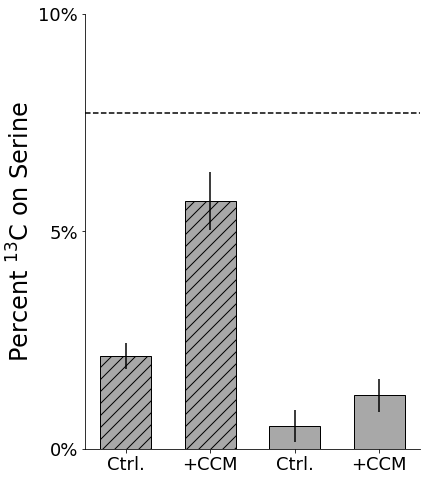

In [15]:
plt.figure(figsize=(6,8))
gly_coupling_slope = 2.156
theoretical_max_ser = 1/(2*3*gly_coupling_slope)

mean12c_atom_frac = frac12c_df.groupby('sample_name').mean()
std12c_atom_frac = frac12c_df.groupby('sample_name').std()
bar_vals = mean12c_atom_frac.loc[xorder].ser.values
err_vals = std12c_atom_frac.loc[xorder].ser.values

xs = np.arange(len(xorder)) + 0.5
bars = plt.bar(xs, bar_vals, width=0.6, color=greys[3], edgecolor='k')
plt.errorbar(xs, bar_vals, yerr=err_vals, ls='None', ecolor='k')
plt.axhline(theoretical_max_ser, ls='--', c='k')

for b in bars[:-2]:
    b.set_hatch('//')

plt.xticks(xs, xticks, ha='center', fontsize=18)
ys = np.arange(0.0, 0.11, 0.05)
plt.yticks(ys, ['%d%%' % (100*y) for y in ys], fontsize=18)
plt.ylabel('Percent $^{13}$C on Serine', fontsize=24)
plt.xlabel('')
sns.despine()
#plt.savefig('Fig4_ser.png', dpi=400)
plt.show()

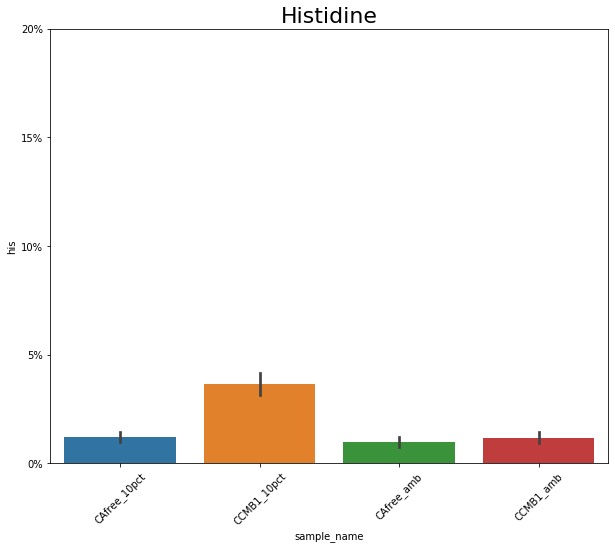

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(data=frac12c_df, x='sample_name', y='his', order=xorder)
plt.title('Histidine', fontsize=22)
plt.xticks(rotation=45, ha='center')
ys = np.arange(0.0, 0.21, 0.05)
plt.yticks(ys, ['%d%%' % (100*y) for y in ys])
plt.show()

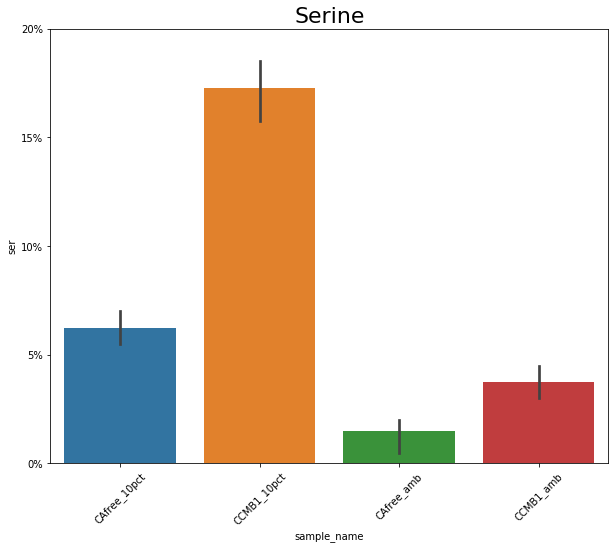

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(data=mol_frac12c_df, x='sample_name', y='ser', order=xorder)
plt.title('Serine', fontsize=22)
plt.xticks(rotation=45, ha='center')
ys = np.arange(0.0, 0.21, 0.05)
plt.yticks(ys, ['%d%%' % (100*y) for y in ys])
plt.show()

Mol fraction 12C plots

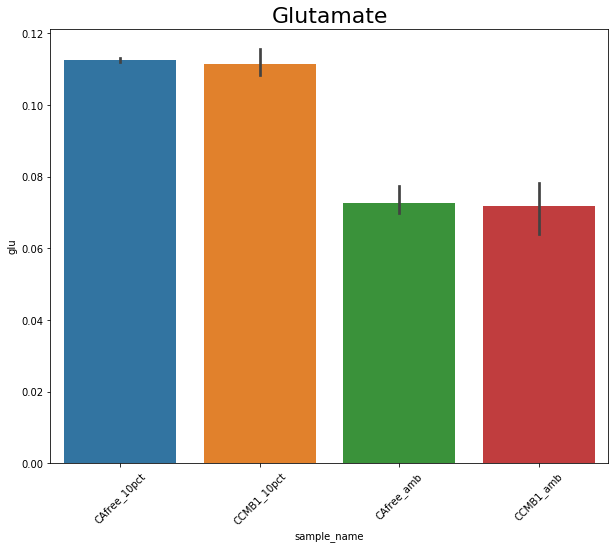

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(data=frac12c_df, x='sample_name', y='glu', order=xorder)
plt.title('Glutamate', fontsize=22)
plt.xticks(rotation=45, ha='center')
plt.show()

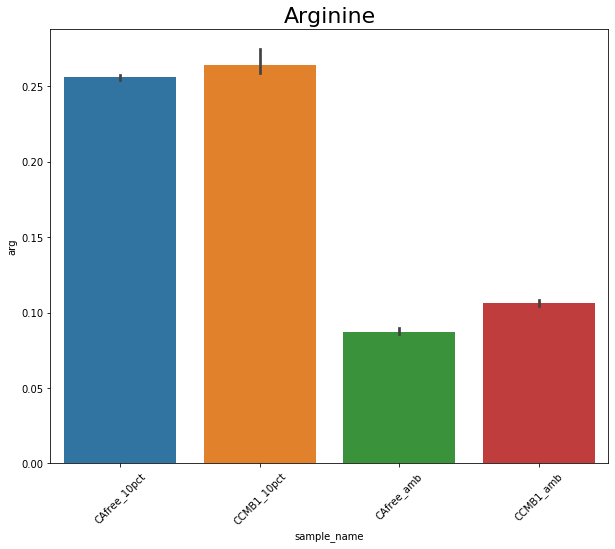

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(data=frac12c_df, x='sample_name', y='arg', order=xorder)
plt.title('Arginine', fontsize=22)
plt.xticks(rotation=45, ha='center')
plt.show()

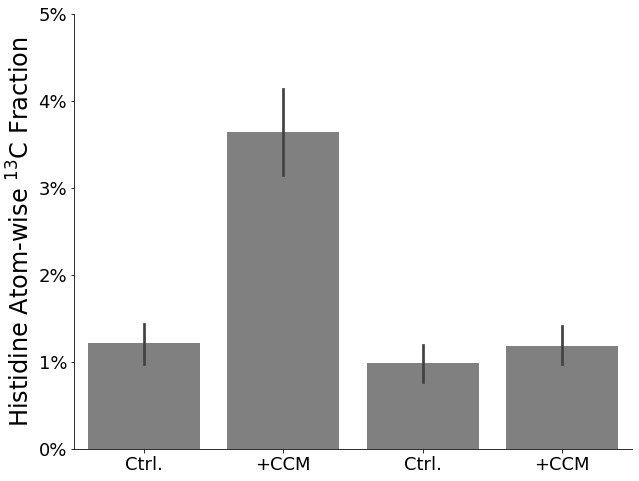

In [14]:
plt.figure(figsize=(10,8))
gly_coupling_slope = 2.156
theoretical_max_ser = 1/(2*3*gly_coupling_slope)

sns.barplot(data=frac12c_df, x='sample_name', y='his', order=xorder, color='grey')
    
#plt.axhline(theoretical_max_ser, ls='--', c='k')

plt.xticks(np.arange(4), xticks, ha='center', fontsize=18)
ys = np.arange(0.0, 0.06, 0.01)
plt.yticks(ys, ['%d%%' % (100*y) for y in ys], fontsize=18)
plt.ylabel('Histidine Atom-wise $^{13}$C Fraction', fontsize=24)
plt.xlabel('')
sns.despine()
plt.show()